In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [3]:
! git clone https://github.com/ugurarabaci/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 42.03 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [4]:
import os 
dosya_konumu= '/content/datasets/Data'
train_konumu= os.path.join(dosya_konumu, 'train')
test_konumu= os.path.join(dosya_konumu, 'test')
train_covid_konumu= os.path.join(train_konumu, 'COVID19')
train_normal_konumu= os.path.join(train_konumu, 'NORMAL')
test_covid_konumu= os.path.join(test_konumu, 'COVID19')
test_normal_konumu= os.path.join(test_konumu, 'NORMAL')


(1024, 1024, 3)
(1024, 1024, 3)
(1317, 1857, 3)
(1509, 2111, 3)
Sınıf sayısı:  2
toplam normal goruntu sayisi:  712
toplam covid goruntu sayisi:  1583
toplam goruntu sayisi:  2295


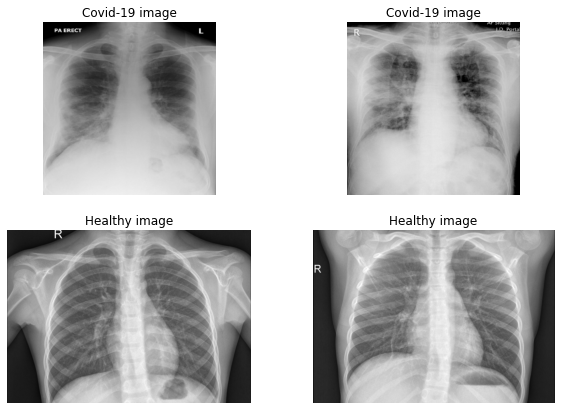

In [8]:
from keras.preprocessing.image import load_img, img_to_array
from glob import glob
import cv2
import os 
from matplotlib import pyplot as plt

train_covidler=os.listdir(train_covid_konumu)
test_covidler=os.listdir(test_covid_konumu)
train_normaller=os.listdir(train_normal_konumu)
test_normaller=os.listdir(test_normal_konumu)

toplamGoruntu= len(train_covidler)+len(test_covidler)+len(train_normaller)+len(test_normaller)
toplamCovid= len(train_covidler)+len(test_covidler)
toplamNormal= len(train_normaller)+len(test_normaller)

satir = 2
sutun = 2
fig = plt.figure(figsize=(10, 7))

img=load_img(train_covid_konumu+'/COVID-19 (1).jpeg')
img2=load_img(train_covid_konumu+'/COVID-19 (2).jpeg')
img3=load_img(train_normal_konumu+'/NORMAL(0).jpg')
img4=load_img(train_normal_konumu+'/NORMAL(1).jpg')

fig.add_subplot(satir, sutun, 1)


plt.imshow(img)
plt.axis("off")
plt.title("Covid-19 image")

fig.add_subplot(satir, sutun, 2)

plt.imshow(img2)
plt.axis("off")
plt.title("Covid-19 image")

fig.add_subplot(satir, sutun, 3)

plt.imshow(img3)
plt.axis("off")
plt.title("Healthy image")

fig.add_subplot(satir, sutun, 4)

plt.imshow(img4)
plt.axis("off")
plt.title("Healthy image")

x=img_to_array(img)
x1=img_to_array(img2)
x2=img_to_array(img3)
x3=img_to_array(img4)

print(x.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)


className = glob(train_konumu + '/*')
numberOfClass= len(className)
print("Sınıf sayısı: ", numberOfClass)
print('toplam normal goruntu sayisi: ', toplamCovid)
print('toplam covid goruntu sayisi: ', toplamNormal)
print('toplam goruntu sayisi: ', toplamGoruntu)

['/content/datasets/Data/train/COVID19/COVID19(159).jpg', '/content/datasets/Data/train/COVID19/COVID19(542).jpg', '/content/datasets/Data/train/COVID19/COVID19(0).jpg', '/content/datasets/Data/train/COVID19/COVID19(421).jpg', '/content/datasets/Data/train/COVID19/COVID19(120).jpg', '/content/datasets/Data/train/COVID19/COVID19(190).jpg', '/content/datasets/Data/train/COVID19/COVID19(65).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (168).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1337).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(112).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(246).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1296).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1163).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1137).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1446).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(957).jpg']


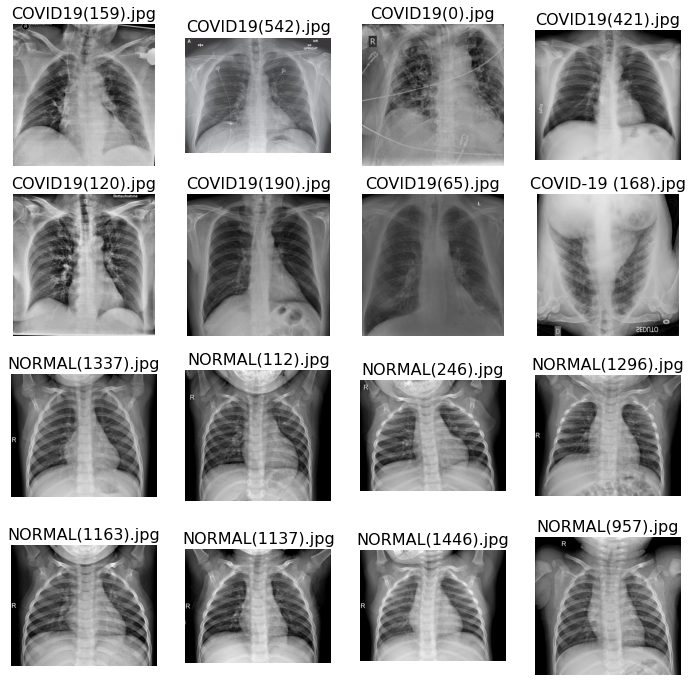

In [ ]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt




satir=4
sutun=4 

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic=[os.path.join(train_covid_konumu, fname) for fname in train_covidler[0:8]]
next_normal_pic=[os.path.join(train_normal_konumu, fname) for fname in train_normaller[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(satir,sutun,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=16)
  plt.imshow(img, cmap='gray' )

plt.show()

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(150,150),
                                                  subset='training',
                                                  batch_size=32,
                                                  class_mode= 'binary')


validation_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(150,150),
                                                  subset='validation',
                                                  batch_size=32,
                                                  class_mode= 'binary')


test_generator=test_datagen.flow_from_directory(test_konumu ,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode= 'binary')



Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


# Yeni Bölüm

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
46/46 [==============================] - 84s 1s/step - loss: 2.0448 - accuracy: 0.7102 - val_loss: 0.4606 - val_accuracy: 0.8344
Epoch 2/30
46/46 [==============================] - 54s 1s/step - loss: 0.2690 - accuracy: 0.8856 - val_loss: 0.1932 - val_accuracy: 0.9406
Epoch 3/30
46/46 [==============================] - 54s 1s/step - loss: 0.2031 - accuracy: 0.9268 - val_loss: 0.1522 - val_accuracy: 0.9594
Epoch 4/30
46/46 [==============================] - 55s 1s/step - loss: 0.1488 - accuracy: 0.9370 - val_loss: 0.1489 - val_accuracy: 0.9594
Epoch 5/30
46/46 [==============================] - 54s 1s/step - loss: 0.1104 - accuracy: 0.9625 - val_loss: 0.1439 - val_accuracy: 0.9563
Epoch 6/30
46/46 [==============================] - 55s 1s/step - loss: 0.0974 - accuracy: 0.9671 - val_loss: 0.1065 - val_accuracy: 0.9719
Epoch 7/30
46/46 [==============================] - 55s 1s/step - loss: 0.1408 - accuracy: 0.9411 - val_loss: 0.1371 - val_accuracy: 0.9531
Epoch 8/30
46/46 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

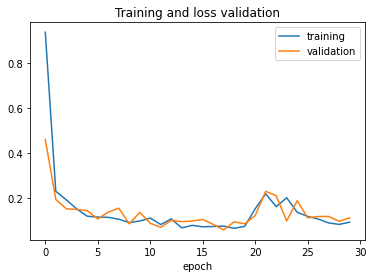

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and loss validation')
plt.xlabel('epoch')